# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [12]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Challenge 1

#### The data we will use in this challenge is:

In [13]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

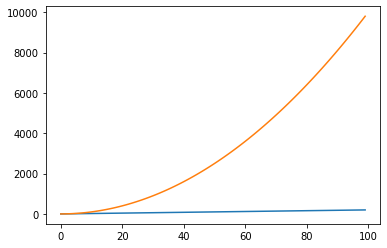

In [14]:
chart = plt.plot(x,y)
chart = plt.plot(x,z)
plt.show(chart)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

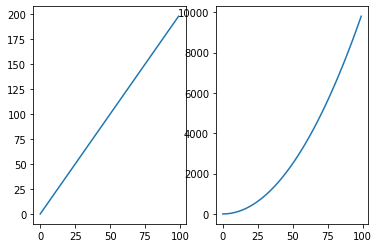

In [15]:


_ , (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2)
chart_1.plot(x,y)
chart_2.plot(x,z)




#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

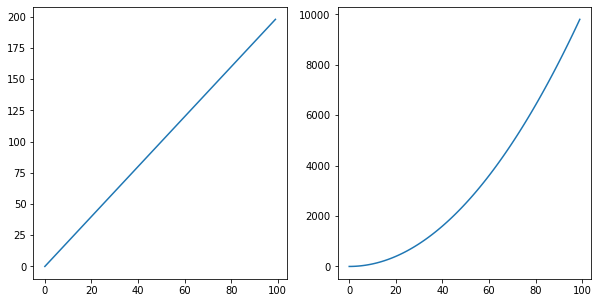

In [16]:
_ , (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
chart_1.plot(x,y)
chart_2.plot(x,z)

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [17]:

from math import e


x = np.arange(0,100)
set_xscale = x*x
set_yscale = e^x

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
chart = plt.plot(x,y)
chart = plt.plot(x,z)
plt.show(chart)

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [ ]:
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

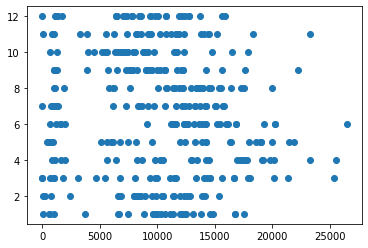

In [ ]:
# MEDIAN STEPS BY MONTH_ENCODED
plt.scatter(fitbit['Steps'], fitbit['Months_encoded'])

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
# your code here

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [22]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [ ]:
type(titanic)

pandas.core.frame.DataFrame

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [37]:
# NUMERICAL VARIABLES
# your code here
titanic['PassengerId'].dtypes
titanic['Survived'].dtypes
titanic['Pclass'].dtypes
titanic['Age'].dtypes
titanic['SibSp'].dtypes
titanic['Parch'].dtypes
titanic['Fare'].dtypes


dtype('int64')

In [29]:
# CATEGORICAL VARIABLES
# your code here
titanic['Name'].dtypes
titanic['Gender'].dtypes
titanic['Cabin'].dtypes
titanic['Embarked'].dtypes
titanic['Ticket'].dtypes


dtype('O')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [40]:
from matplotlib import style
  
print(plt.style.available)

plt.style.use('classic')
plt.figure(figsize=(12,6))


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

In [42]:
age_visuals = titanic['Age']

<AxesSubplot:>

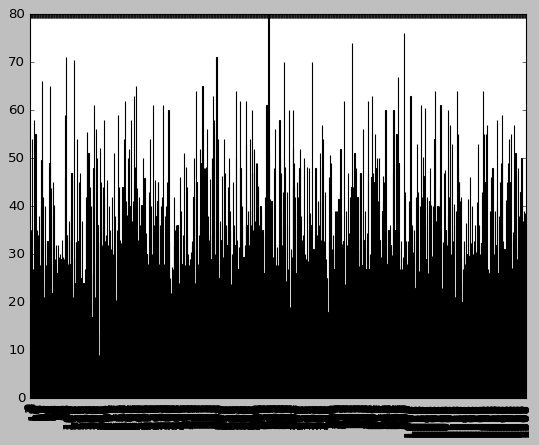

In [43]:
age_visuals.plot.bar()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

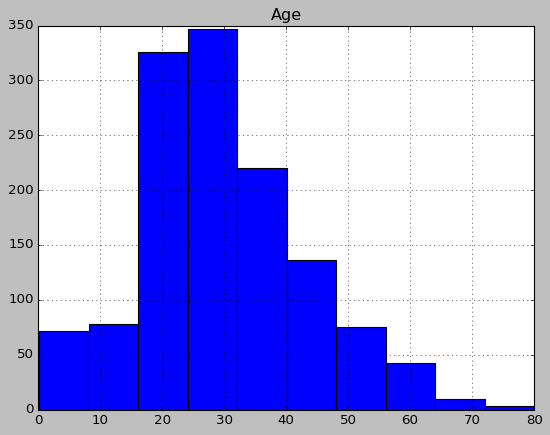

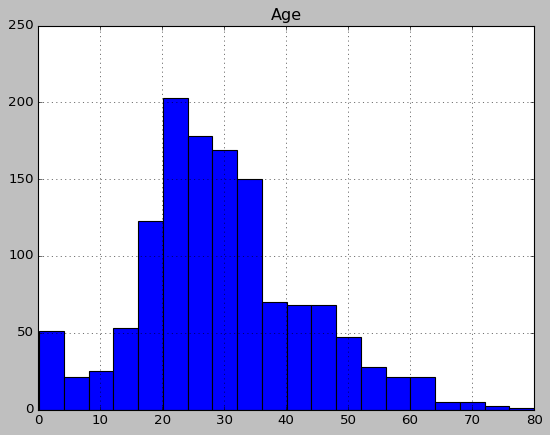

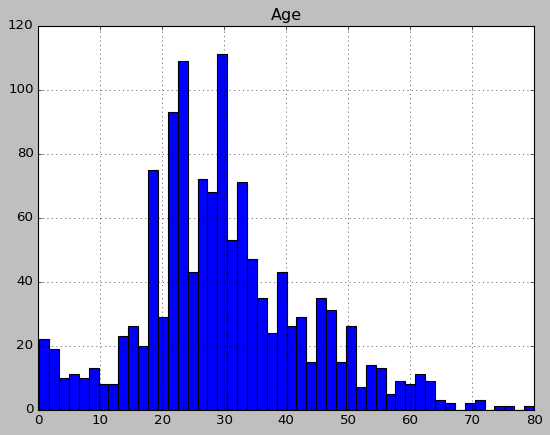

In [44]:
titanic.hist(column='Age', bins=10)
titanic.hist(column='Age', bins=20)
titanic.hist(column='Age', bins=50)



#### How does the bin size affect your plot?

In [ ]:
"""
# Yes, the bigger the bin the smaller the size of the histogram or the chart
"""

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Count', ylabel='Age'>

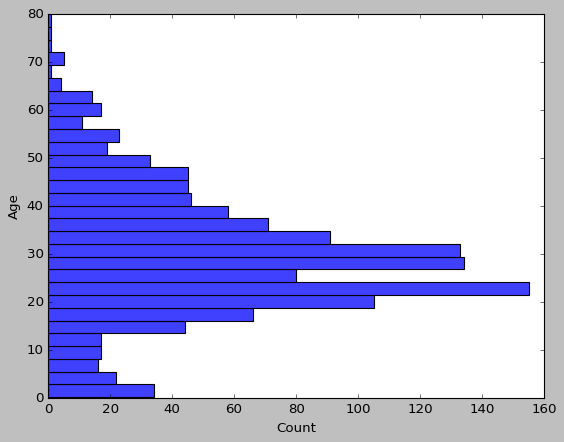

In [46]:
sns.histplot(data=titanic, y="Age")


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:>

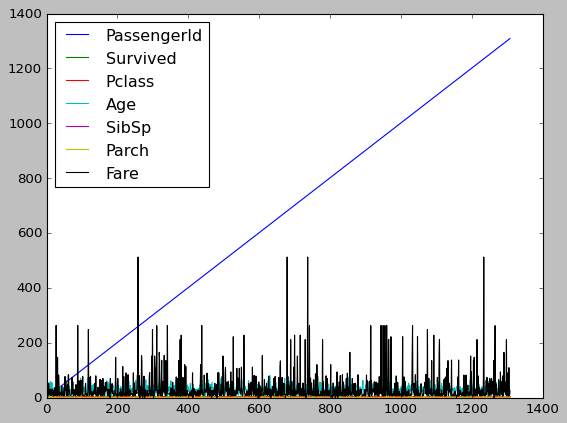

In [51]:
# Method 1 - matplotlib
titanic.plot(column='Gender')


<AxesSubplot:xlabel='Count', ylabel='Gender'>

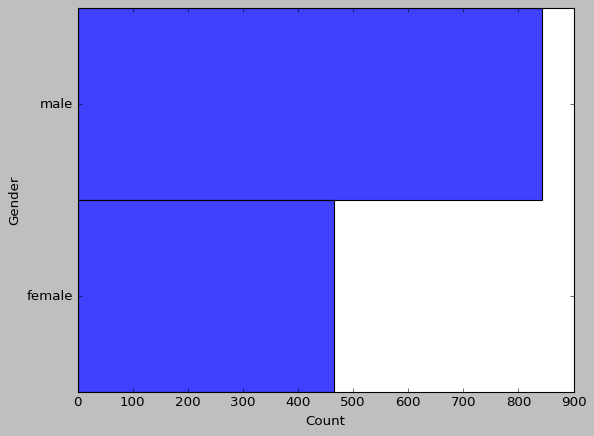

In [48]:
# Method 2 - seaborn
sns.histplot(data=titanic, y="Gender")


#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Count', ylabel='Pclass'>

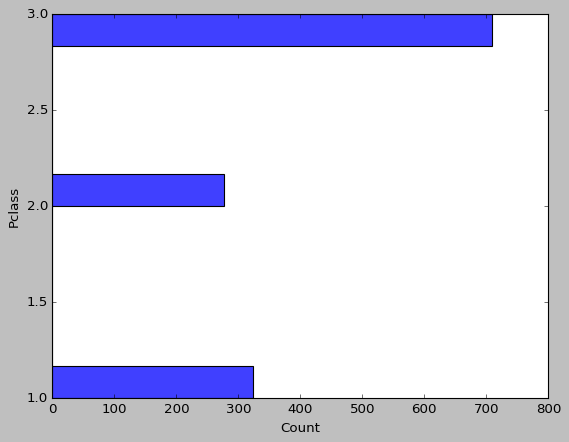

In [52]:
sns.histplot(data=titanic, y="Pclass")


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

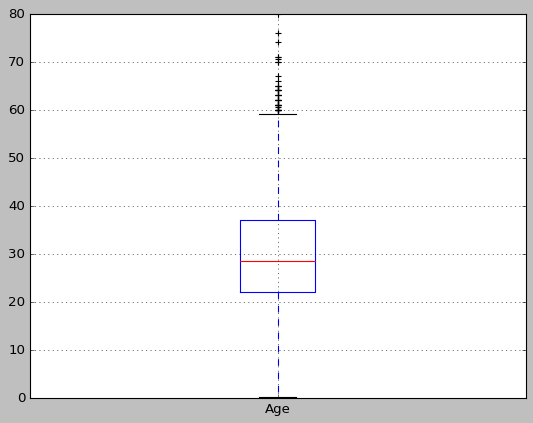

In [53]:
titanic.boxplot(column='Age')

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
it shows me the minimum and maximum ages and also the average ages. It gives a clear summary of the dataset of ages"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

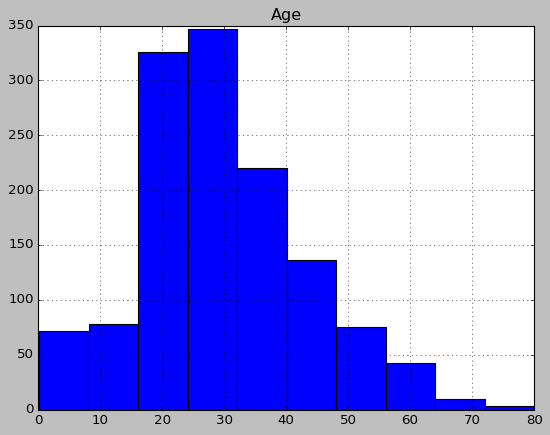

In [55]:
titanic.hist(column='Age')


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
shows me the mode. In order words, the age that had the most people on the ship """

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

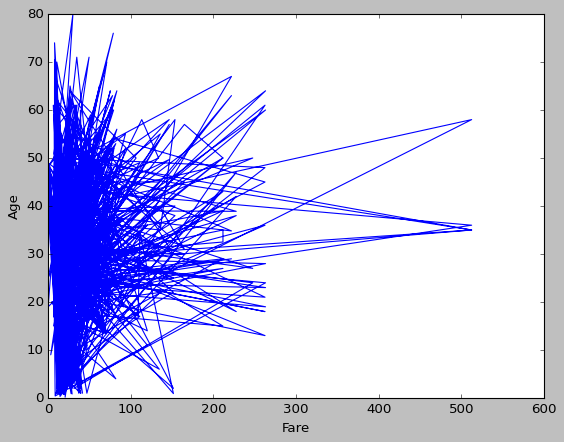

In [60]:
# Method 1 - matplotlib
plt.plot(titanic["Fare"], titanic["Age"])
plt.xlabel("Fare")
plt.ylabel("Age")
plt.show()


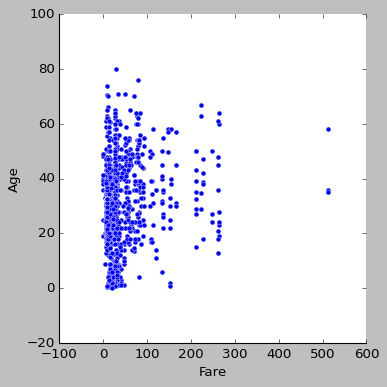

In [61]:
# Method 2 - seaborn
sns.relplot(x="Fare", y="Age", data=titanic)


#### Plot the correlation matrix using seaborn.

In [63]:
corr = titanic.corr()
corr


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


#### What are the most correlated features?

In [ ]:
"""
PassengerID and Age
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [64]:
g = sns.FacetGrid(titanic, col='Age')
g.map(plt.plot, 'Age', 'Gender')
plt.show()

KeyboardInterrupt: 